<a href="https://colab.research.google.com/github/fernando-figueredo/STT-Dataset-Generator/blob/main/Sentence_Detector_and_Transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub
!pip install youtube-dl

     |████████████████████████████████| 1.8MB 4.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

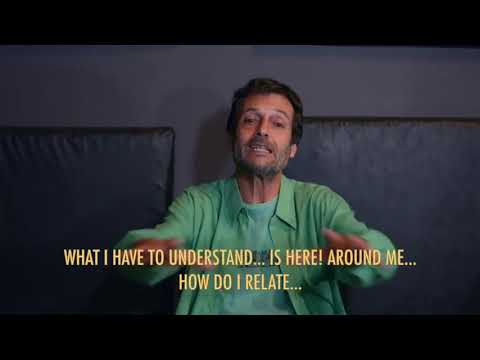

In [ ]:
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'WlqqKVyW3L0'
YouTubeVideo(YOUTUBE_ID)

**Select the folder where the dataset will be saved**

In [ ]:
%cd '/content/drive/My Drive/STTDataset'

/content/drive/My Drive/STTDataset


**Extracting audio from video**

In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "audio.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}

[youtube] WlqqKVyW3L0: Downloading webpage
[youtube] WlqqKVyW3L0: Downloading MPD manifest
[dashsegments] Total fragments: 6
[download] Destination: audio.m4a
[download] 100% of 694.25KiB in 00:02
[ffmpeg] Correcting container in "audio.m4a"
[ffmpeg] Destination: audio.wav
Deleting original file audio.m4a (pass -k to keep)


**Cutting sentences by silence detection**

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence


# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

# Load your audio.  
song = AudioSegment.from_wav("audio.wav")


chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least or 200 ms long.
    min_silence_len = 200,
    # Consider a chunk silent if it's quieter than -40 dBFS.
    silence_thresh = -40
)

# Process each chunk with your parameters
for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk_{0}.wav".format(i))
    normalized_chunk.export(
        ".//chunk_{0}.wav".format(i),
        bitrate = "64",
        format = "wav"
    )

Exporting chunk_0.wav
Exporting chunk_1.wav
Exporting chunk_2.wav
Exporting chunk_3.wav
Exporting chunk_4.wav
Exporting chunk_5.wav
Exporting chunk_6.wav
Exporting chunk_7.wav
Exporting chunk_8.wav
Exporting chunk_9.wav
Exporting chunk_10.wav
Exporting chunk_11.wav
Exporting chunk_12.wav
Exporting chunk_13.wav
Exporting chunk_14.wav
Exporting chunk_15.wav
Exporting chunk_16.wav
Exporting chunk_17.wav


**Transcrição do Áudio**

In [ ]:
!pip install SpeechRecognition
!python -m pip install --upgrade pip setuptools wheel

     |████████████████████████████████| 32.8MB 120kB/s 
     |████████████████████████████████| 1.5MB 4.7MB/s 
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.2)
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.35.1)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

transcricao = ''
j=0

for j in range(i):
    file_audio = sr.AudioFile('chunk_'+str(j)+'.wav')
    with file_audio as source:
      audio_text = r.record(source)
    try:
      transcricao = (r.recognize_google(audio_text,language='pt-BR'))
      file_object = open('transcript.txt', 'a')
      file_object.write(transcricao+ '\n')
    except:
      file_object = open('transcript.txt', 'a')
      file_object.write('\n') 